# Poisson statistics

Let's see what a Poisson distribution looks like.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
l = [1,5,10,25]
hists = {}

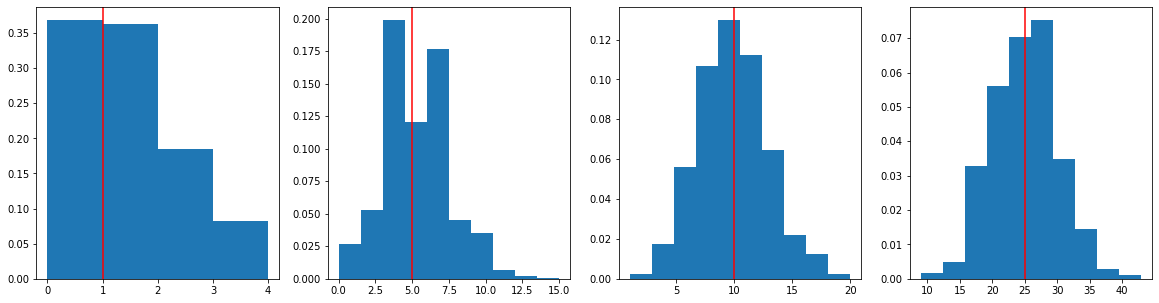

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
for k in range(len(ax)):
    s = np.random.poisson(l[k],1500)
    hists[l[k]]=s
    nbins = min([max(s),10])
    ax[k].hist(s,nbins,density=True)
    ax[k].axvline(x=l[k],c='r')

What's the expectation value of a Poisson distribution? The variance?

In [107]:
h = hists[10]
print("Mean:",np.mean(h))
print("Variance:",np.var(h))

Mean: 9.841333333333333
Variance: 10.089491555555554


Let's simulate a **Poisson process**. 

A Poisson process is defined via a sequence of exponential random variables $\tau_i$, with parameter $\lambda$. The process is defined in terms of $T_n=\sum_{i=1}^n \tau_i$ (the *n-th arrival time*), and $N(s)=\max(n:T_n\leq s)$ (the *number of arrivals*).

Poisson process properties:
- Stochastic (random outcomes according to a distribution)
- Independent increments, so the number of arrivals in different intervals is independent

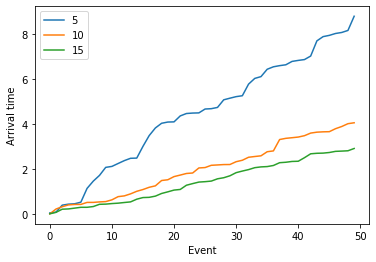

In [110]:
l = [5,10,15]
times = {}
for k in l:
    T = np.random.exponential(scale=1/k,size=50)
    T = np.cumsum(T)
    plt.plot(T,label=k)
    times[k]=T
plt.xlabel('Event')
plt.ylabel('Arrival time')
plt.legend()

In [111]:
np.argmax(times[5]>2)

9

$N(s)$ is a Poisson random variable with parameter $\lambda s$.

Mean: 30.560
Variance: 28.966


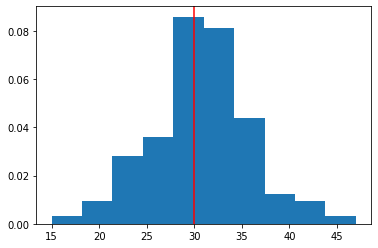

In [112]:
s = 2
l = 15
N = []
for n in range(200):
    T = np.random.exponential(scale=1/l,size=50)
    T = np.cumsum(T)
    N.append(np.argmax(T>s))
plt.hist(N,10,density=True)
plt.axvline(x=l*s,c='r')
print("Mean: {:.3f}".format(np.mean(N)))
print("Variance: {:.3f}".format(np.var(N)))